In [3]:
!pip install py7zr
import py7zr

with py7zr.SevenZipFile('final_data.7z', mode='r') as z:
    z.extractall(path="<output path>")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 27.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

%load_ext autoreload
%autoreload 2

In [5]:
data_dir = "<output path>/final_data/"

attendance_file = "attendance.csv"
entity_file = "entity_schedule.csv"
link_attraction_file = "link_attraction_park.csv"
parade_file = "parade_night_show.xlsx"
waiting_file = "waiting_times.csv"
weather_file = "weather_data.csv"

In [6]:
attendance_df = pd.read_csv(os.path.join(data_dir, attendance_file))
entity_df = pd.read_csv(os.path.join(data_dir, entity_file))
link_attraction_park_df = pd.read_csv(os.path.join(data_dir, link_attraction_file), sep=";")
parades_df = pd.read_excel(os.path.join(data_dir, parade_file))
waiting_time_df = pd.read_csv(os.path.join(data_dir, waiting_file))
weather_df = pd.read_csv(os.path.join(data_dir, weather_file))

In [7]:
# Put the date in the same format as waiting time in quarter of 15min
weather_df['dt_iso'] = weather_df['dt_iso']
weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'].str.slice(0,13), format='%Y-%m-%d %H')
weather_df = weather_df[weather_df['timezone'] == 3600]
weather_df['dt_iso+1'] = weather_df['dt_iso'].apply(lambda row: row + pd.Timedelta(hours=1))
weather_df['QUARTER'] = weather_df.apply(lambda row: pd.date_range(row['dt_iso'], row['dt_iso+1'], freq='15min'), axis=1)
weather_df = weather_df.explode('QUARTER')
weather_df = weather_df.drop(columns=['dt_iso', 'dt_iso+1', 'timezone'])
weather_df = weather_df.rename(columns={'QUARTER': 'date'})
weather_df = weather_df.drop_duplicates(subset='date', keep='first')
weather_df

,dt,city_name,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date
0,915148800,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,8.14,9.32,...,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n,1999-01-01 00:00:00
0,915148800,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,8.14,9.32,...,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n,1999-01-01 00:15:00
0,915148800,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,8.14,9.32,...,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n,1999-01-01 00:30:00
0,915148800,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,8.14,9.32,...,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n,1999-01-01 00:45:00
0,915148800,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,8.14,9.32,...,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n,1999-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203663,1648335600,Custom location,48.873492,2.295104,10.41,NaN,2.27,8.99,8.74,12.88,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n,2022-03-27 00:00:00
203664,1648339200,Custom location,48.873492,2.295104,9.50,NaN,2.36,7.49,7.74,12.31,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n,2022-03-27 00:15:00
203664,1648339200,Custom location,48.873492,2.295104,9.50,NaN,2.36,7.49,7.74,12.31,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n,2022-03-27 00:30:00
203664,1648339200,Custom location,48.873492,2.295104,9.50,NaN,2.36,7.49,7.74,12.31,...,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n,2022-03-27 00:45:00


In [8]:
# Merge the waiting time and weather data
waiting_time_df['FIN_TIME'] = waiting_time_df['FIN_TIME'].str.slice(0,16)
waiting_time_df['FIN_TIME'] = pd.to_datetime(waiting_time_df['FIN_TIME'], format='%Y-%m-%d %H:%M')
waiting_time_df['DEB_TIME'] = waiting_time_df['DEB_TIME'].str.slice(0,16)
waiting_time_df['DEB_TIME'] = pd.to_datetime(waiting_time_df['DEB_TIME'], format='%Y-%m-%d %H:%M')
merge_1 = waiting_time_df.merge(weather_df, left_on='FIN_TIME', right_on='date' , how='left')
merge_1

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,39.0,802.0,Clouds,scattered clouds,03n,2018-01-01 21:15:00
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,NaN,NaN,NaN,NaN,23.0,801.0,Clouds,few clouds,02n,2018-01-01 19:45:00
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,51.0,803.0,Clouds,broken clouds,04n,2018-01-01 22:45:00
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,0.92,NaN,NaN,NaN,99.0,500.0,Rain,light rain,10d,2018-01-01 13:00:00
4,2018-01-01,2018-01-01 17:00:00,17,2018-01-01 17:15:00,Skyway,5,15.0,92.0,211.500,198.25,...,0.25,NaN,NaN,NaN,100.0,500.0,Rain,light rain,10n,2018-01-01 17:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509319,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,Himalaya Ride,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3509320,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3509321,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3509322,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,Giga Coaster,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [9]:
# Merge attendance and link attraction park data
merge_1 = merge_1.merge(link_attraction_park_df, left_on='ENTITY_DESCRIPTION_SHORT', right_on='ATTRACTION', how='left')
merge_1

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date,ATTRACTION,PARK
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,NaN,NaN,39.0,802.0,Clouds,scattered clouds,03n,2018-01-01 21:15:00,Roller Coaster,PortAventura World
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,NaN,NaN,23.0,801.0,Clouds,few clouds,02n,2018-01-01 19:45:00,Bumper Cars,PortAventura World
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,NaN,NaN,51.0,803.0,Clouds,broken clouds,04n,2018-01-01 22:45:00,Rapids Ride,PortAventura World
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,NaN,NaN,99.0,500.0,Rain,light rain,10d,2018-01-01 13:00:00,Crazy Dance,PortAventura World
4,2018-01-01,2018-01-01 17:00:00,17,2018-01-01 17:15:00,Skyway,5,15.0,92.0,211.500,198.25,...,NaN,NaN,100.0,500.0,Rain,light rain,10n,2018-01-01 17:15:00,Skyway,Tivoli Gardens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509319,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,Himalaya Ride,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Himalaya Ride,PortAventura World
3509320,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Crazy Dance,PortAventura World
3509321,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Crazy Dance,PortAventura World
3509322,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,Giga Coaster,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Giga Coaster,PortAventura World


In [10]:
# Merge merge_1 and attendance data
merge_1 = merge_1.merge(attendance_df, left_on=['PARK','WORK_DATE'] , right_on=['FACILITY_NAME', 'USAGE_DATE'], how='left')
merge_1

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,weather_id,weather_main,weather_description,weather_icon,date,ATTRACTION,PARK,USAGE_DATE,FACILITY_NAME,attendance
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,802.0,Clouds,scattered clouds,03n,2018-01-01 21:15:00,Roller Coaster,PortAventura World,NaN,NaN,NaN
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,801.0,Clouds,few clouds,02n,2018-01-01 19:45:00,Bumper Cars,PortAventura World,NaN,NaN,NaN
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,803.0,Clouds,broken clouds,04n,2018-01-01 22:45:00,Rapids Ride,PortAventura World,NaN,NaN,NaN
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,500.0,Rain,light rain,10d,2018-01-01 13:00:00,Crazy Dance,PortAventura World,NaN,NaN,NaN
4,2018-01-01,2018-01-01 17:00:00,17,2018-01-01 17:15:00,Skyway,5,15.0,92.0,211.500,198.25,...,500.0,Rain,light rain,10n,2018-01-01 17:15:00,Skyway,Tivoli Gardens,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509319,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,Himalaya Ride,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaT,Himalaya Ride,PortAventura World,NaN,NaN,NaN
3509320,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaT,Crazy Dance,PortAventura World,NaN,NaN,NaN
3509321,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaT,Crazy Dance,PortAventura World,NaN,NaN,NaN
3509322,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,Giga Coaster,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaT,Giga Coaster,PortAventura World,NaN,NaN,NaN


In [11]:

import pandas as pd
# Add ending date for Night show and Parade 1 and 2

parades_df = parades_df.rename(columns={'NIGHT_SHOW': 'NIGHT_SHOW_STARTING_HOUR',
                                        'PARADE_1': 'PARADE_1_STARTING_HOUR',
                                        'PARADE_2': 'PARADE_2_STARTING_HOUR'})

# Supposons que parades_df est votre DataFrame et a déjà été défini
parades_df['NIGHT_SHOW_STARTING_HOUR'] = pd.to_datetime(parades_df['NIGHT_SHOW_STARTING_HOUR'], format='%H:%M:%S')
parades_df['PARADE_1_STARTING_HOUR'] = pd.to_datetime(parades_df['PARADE_1_STARTING_HOUR'], format='%H:%M:%S')
parades_df['PARADE_2_STARTING_HOUR'] = pd.to_datetime(parades_df['PARADE_2_STARTING_HOUR'], format='%H:%M:%S')

# Assurez-vous que la colonne WORK_DATE est au format datetime
parades_df['WORK_DATE'] = pd.to_datetime(parades_df['WORK_DATE'])

# Fonction pour combiner les dates et heures tout en gérant les valeurs potentiellement invalides
def combine_date_hour(row, time_col):
    # Extraire les composants de la date
    year, month, day = row['WORK_DATE'].year, row['WORK_DATE'].month, row['WORK_DATE'].day

    # Convertir la colonne d'heure en datetime si ce n'est pas déjà fait
    time_val = pd.to_datetime(row[time_col], errors='coerce', format='%H:%M:%S')

    # Vérifier si time_val est NaT (Not a Time), auquel cas retourner la valeur originale
    if pd.isna(time_val):
        return None  # ou retourner row[time_col] si vous voulez garder l'heure originale

    # Extraire les composants de l'heure
    hour, minute, second = time_val.hour, time_val.minute, time_val.second

    # Créer et retourner le nouveau Timestamp
    return pd.Timestamp(year=year, month=month, day=day, hour=hour, minute=minute, second=second)

# Appliquer la fonction pour chaque colonne d'heure
for col in ['NIGHT_SHOW_STARTING_HOUR', 'PARADE_1_STARTING_HOUR', 'PARADE_2_STARTING_HOUR']:
    parades_df[f'{col}'] = parades_df.apply(combine_date_hour, time_col=col, axis=1)

def adjust_hour(time):
    # Extraire les heures et les minutes
    hour = time.hour
    minute = time.minute

    # Appliquer les conditions spécifiées pour ajuster l'heure
    if hour == 18 and minute == 40:
        return time.replace(minute=30)
    elif hour == 18 and minute == 10:
        return time.replace(minute=0)
    elif hour == 20 and minute == 20:
        return time.replace(minute=30)
    elif hour == 19 and minute == 10:
        return time.replace(minute=0)
    elif hour == 11 and minute == 50:
        return time.replace(hour=12) and time.replace(minute=0)
    elif hour == 12 and minute == 10:
        return time.replace(minute=0)
    elif hour == 10 and minute == 50:
        return time.replace(minute=0) and time.replace(hour=11)
    elif hour == 12 and minute == 25:
        return time.replace(minute=30)
    elif hour == 12 and minute == 55:
        return time.replace(minute=0) and time.replace(hour=13)
    elif hour == 13 and minute == 55:
        return time.replace(minute=0) and time.replace(hour=14)
    else:
        return time


# Appliquer la fonction pour ajuster les heures
parades_df['NIGHT_SHOW_STARTING_HOUR'] = parades_df['NIGHT_SHOW_STARTING_HOUR'].apply(adjust_hour)
parades_df['PARADE_1_STARTING_HOUR'] = parades_df['PARADE_1_STARTING_HOUR'].apply(adjust_hour)
parades_df['PARADE_2_STARTING_HOUR'] = parades_df['PARADE_2_STARTING_HOUR'].apply(adjust_hour)


parades_df['PARADE_1_ENDING_HOUR'] = parades_df['PARADE_1_STARTING_HOUR'] + pd.Timedelta(minutes=30)
parades_df['PARADE_2_ENDING_HOUR'] = parades_df['PARADE_2_STARTING_HOUR'] + pd.Timedelta(minutes=30)
parades_df['NIGHT_SHOW_ENDING_HOUR'] = parades_df['NIGHT_SHOW_STARTING_HOUR'] + pd.Timedelta(minutes=30)

In [12]:
parade_1 = parades_df[['PARADE_1_STARTING_HOUR', 'PARADE_1_ENDING_HOUR']]
parade_1['DATE'] = parade_1.apply(lambda row: pd.date_range(row['PARADE_1_STARTING_HOUR'], row['PARADE_1_ENDING_HOUR'], freq='15min'), axis=1)
parade_1 = parade_1.explode('DATE')
parade_1['IS PARADE 1'] = 1
parade_1 = parade_1.drop(columns=['PARADE_1_STARTING_HOUR', 'PARADE_1_ENDING_HOUR'])
parade_1

<ipython-input-12-7d7c7a08b615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parade_1['DATE'] = parade_1.apply(lambda row: pd.date_range(row['PARADE_1_STARTING_HOUR'], row['PARADE_1_ENDING_HOUR'], freq='15min'), axis=1)


,DATE,IS PARADE 1
0,2018-10-01 17:30:00,1
0,2018-10-01 17:45:00,1
0,2018-10-01 18:00:00,1
1,2018-10-02 17:30:00,1
1,2018-10-02 17:45:00,1
...,...,...
669,2022-08-17 17:45:00,1
669,2022-08-17 18:00:00,1
670,2022-08-18 17:30:00,1
670,2022-08-18 17:45:00,1


In [13]:
parade_2 = parades_df[['PARADE_2_STARTING_HOUR', 'PARADE_2_ENDING_HOUR']]
parade_2 = parade_2.dropna()
parade_2['DATE'] = parade_2.apply(lambda row: pd.date_range(row['PARADE_2_STARTING_HOUR'], row['PARADE_2_ENDING_HOUR'], freq='15min'), axis=1)
parade_2 = parade_2.explode('DATE')
parade_2['IS PARADE 2'] = 1
parade_2 = parade_2.drop(columns=['PARADE_2_STARTING_HOUR', 'PARADE_2_ENDING_HOUR'])
parade_2

,DATE,IS PARADE 2
0,2018-10-01 12:00:00,1
0,2018-10-01 12:15:00,1
0,2018-10-01 12:30:00,1
1,2018-10-02 12:00:00,1
1,2018-10-02 12:15:00,1
...,...,...
461,2020-01-05 12:15:00,1
461,2020-01-05 12:30:00,1
462,2020-01-06 11:30:00,1
462,2020-01-06 11:45:00,1


In [14]:
parades_df_night = parades_df[['NIGHT_SHOW_STARTING_HOUR', 'NIGHT_SHOW_ENDING_HOUR']]
parades_df_night['DATE'] = parades_df_night.apply(lambda row: pd.date_range(row['NIGHT_SHOW_STARTING_HOUR'], row['NIGHT_SHOW_ENDING_HOUR'], freq='15min'), axis=1)
parades_df_night = parades_df_night.explode('DATE')
parades_df_night['IS NIGHT SHOW'] = 1
parades_df_night = parades_df_night.drop(columns=['NIGHT_SHOW_STARTING_HOUR', 'NIGHT_SHOW_ENDING_HOUR'])
parades_df_night

<ipython-input-14-b33b5f4fbb0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parades_df_night['DATE'] = parades_df_night.apply(lambda row: pd.date_range(row['NIGHT_SHOW_STARTING_HOUR'], row['NIGHT_SHOW_ENDING_HOUR'], freq='15min'), axis=1)


,DATE,IS NIGHT SHOW
0,2018-10-01 20:00:00,1
0,2018-10-01 20:15:00,1
0,2018-10-01 20:30:00,1
1,2018-10-02 20:00:00,1
1,2018-10-02 20:15:00,1
...,...,...
669,2022-08-17 23:15:00,1
669,2022-08-17 23:30:00,1
670,2022-08-18 23:00:00,1
670,2022-08-18 23:15:00,1


In [15]:
merge_1 = merge_1.merge(parades_df_night, left_on='DEB_TIME' , right_on='DATE', how='left')
merge_1 = merge_1.merge(parade_1, left_on='DEB_TIME' , right_on='DATE', how='left')
merge_1 = merge_1.merge(parade_2, left_on='DEB_TIME' , right_on='DATE', how='left')

In [16]:
merge_1 = merge_1[merge_1['PARK'] == 'PortAventura World']
merge_1['IS NIGHT SHOW'].fillna(0, inplace=True)
merge_1['IS PARADE 1'].fillna(0, inplace=True)
merge_1['IS PARADE 2'].fillna(0, inplace=True)
merge_1.drop(columns= ['DATE_x', 'DATE_y', 'DATE','FACILITY_NAME', 'date', 'weather_icon', 'weather_id', 'USAGE_DATE', 'city_name', 'dt', 'lat', 'lon', 'PARK', 'ENTITY_DESCRIPTION_SHORT'], inplace=True)

<ipython-input-16-cfa0fd0d5f52>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_1['IS NIGHT SHOW'].fillna(0, inplace=True)
<ipython-input-16-cfa0fd0d5f52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_1['IS NIGHT SHOW'].fillna(0, inplace=True)
<ipython-input-16-cfa0fd0d5f52>:3: FutureWarning: A value is trying to be set on a co

In [18]:
#Donne moi le pourcantge de valeurs manquantes
colonne_nulle = merge_1.isnull().mean() * 100
colonne_nulle[colonne_nulle > 0]
merge_1 = merge_1.drop(columns=colonne_nulle[colonne_nulle > 80].index)

In [19]:
# Inputation par 0 pour les valeurs manquantes pour attendance
merge_1['attendance'].fillna(0, inplace=True)

#Imputation de la moyenne pour les valeurs manquantes pour les autres colonnes
merge_1['temp'].fillna(merge_1['temp'].mean(), inplace=True)
merge_1['feels_like'].fillna(merge_1['feels_like'].mean(), inplace=True)
merge_1['temp_min'].fillna(merge_1['temp_min'].mean(), inplace=True)
merge_1['temp_max'].fillna(merge_1['temp_max'].mean(), inplace=True)
merge_1['pressure'].fillna(merge_1['pressure'].mean(), inplace=True)
merge_1['humidity'].fillna(merge_1['humidity'].mean(), inplace=True)
merge_1['wind_speed'].fillna(merge_1['wind_speed'].mean(), inplace=True)
merge_1['wind_deg'].fillna(merge_1['wind_deg'].mean(), inplace=True)
merge_1['clouds_all'].fillna(merge_1['clouds_all'].mean(), inplace=True)
merge_1['weather_main'].fillna(merge_1['clouds_all'].mean(), inplace=True)
merge_1 = merge_1.drop(columns=['dew_point', 'weather_description'])
merge_1

<ipython-input-19-0a424d1cede9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_1['attendance'].fillna(0, inplace=True)
<ipython-input-19-0a424d1cede9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,...,humidity,wind_speed,wind_deg,clouds_all,weather_main,ATTRACTION,attendance,IS NIGHT SHOW,IS PARADE 1,IS PARADE 2
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,0,2.0,0.0,0.000,0.00,0,...,84.000000,7.580000,272.00000,39.000000,Clouds,Roller Coaster,0.0,0.0,0.0,0.0
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,5,18.0,148.0,254.749,254.75,15,...,83.000000,8.380000,279.00000,23.000000,Clouds,Bumper Cars,0.0,0.0,0.0,0.0
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,0,1.0,0.0,0.000,0.00,0,...,80.000000,7.410000,270.00000,51.000000,Clouds,Rapids Ride,0.0,0.0,0.0,0.0
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,5,1.0,46.0,250.001,250.00,15,...,93.000000,9.890000,199.00000,99.000000,Rain,Crazy Dance,0.0,0.0,0.0,0.0
5,2018-01-01,2018-01-01 18:15:00,18,2018-01-01 18:30:00,50,3.0,0.0,0.000,0.00,0,...,86.000000,8.760000,284.00000,67.000000,Rain,Free Fall,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509319,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,0,0.0,0.0,0.000,0.00,0,...,83.524512,4.237857,185.22542,70.637711,70.637711,Himalaya Ride,0.0,0.0,0.0,0.0
3509320,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,0,0.0,0.0,0.000,0.00,0,...,83.524512,4.237857,185.22542,70.637711,70.637711,Crazy Dance,0.0,0.0,0.0,0.0
3509321,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,0,0.0,0.0,0.000,0.00,0,...,83.524512,4.237857,185.22542,70.637711,70.637711,Crazy Dance,0.0,0.0,0.0,0.0
3509322,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,0,0.0,0.0,0.000,0.00,0,...,83.524512,4.237857,185.22542,70.637711,70.637711,Giga Coaster,0.0,0.0,0.0,0.0


In [20]:
merge_1.rename(columns={'WORK_DATE': 'DATE',
                        'DEB_TIME': 'START OF 1 RIDE FOR ATTRACTION',
                        'FIN_TIME': 'END OF 1 RIDE FOR ATTRACTION',
                        'DEB_TIME_HOUR': 'HOUR START OF 1 RIDE',
                        'ENTITY_DESCRIPTION_SHORT': 'ATTRACTION NAME',
                        'WAIT_TIME_MAX': 'WAIT TIME',
                        'NB_UNITS': 'NB UNITS',
                        'GUEST_CARRIED': 'GUEST CARRIED',
                        'OPEN TIME': 'ATTRACTION TIME OPEN FOR 15MIN',
                        'UP_TIME': 'REAL TIME ATTRACTION OPEN FOR 15MIN',
                        'DOWNTIME': 'REAL TIME ATTRACTION CLOSES FOR 15MIN',
                        'NB_MAX_UNIT': 'NB MAX UNITS',
                        'temp': 'TEMPERATURE',
                        'feels_like': 'TEMPERATURE FELT',
                        'temp_min': 'TEMPERATURE MINIMUM',
                        'temp_max': 'TEMPERATURE MAXIMUM',
                        'pressure': 'PRESSURE',
                        'humidity': 'HUMIDITY',
                        'wind_speed': 'WIND SPEED',
                        'wind_deg': 'WIND DEG',
                        'clouds_all': 'CLOUD PERCENTAGE',
                        'weather_main': 'WEATHER MAIN',
                        'attendance': 'ATTENDANCE',
                        'ADJUST_CAPACITY': 'ADJUST CAPACITY'
                    }, inplace=True)
merge_1 = merge_1.sort_values(by='START OF 1 RIDE FOR ATTRACTION')
merge_1

,DATE,START OF 1 RIDE FOR ATTRACTION,HOUR START OF 1 RIDE,END OF 1 RIDE FOR ATTRACTION,WAIT TIME,NB UNITS,GUEST CARRIED,CAPACITY,ADJUST CAPACITY,OPEN_TIME,...,HUMIDITY,WIND SPEED,WIND DEG,CLOUD PERCENTAGE,WEATHER MAIN,ATTRACTION,ATTENDANCE,IS NIGHT SHOW,IS PARADE 1,IS PARADE 2
471,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,0,2.0,0.0,0.000,0.00,0,...,83.000000,7.480000,196.00000,100.000000,Clouds,Rapids Ride,0.0,0.0,0.0,0.0
1420,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,0,65.0,0.0,0.000,0.00,0,...,83.000000,7.480000,196.00000,100.000000,Clouds,Merry Go Round,0.0,0.0,0.0,0.0
680,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,5,18.0,108.0,254.749,254.75,15,...,83.000000,7.480000,196.00000,100.000000,Clouds,Bumper Cars,0.0,0.0,0.0,0.0
778,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,0,2.0,0.0,0.000,0.00,0,...,83.000000,7.480000,196.00000,100.000000,Clouds,Go-Karts,0.0,0.0,0.0,0.0
1658,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,0,1.4,0.0,315.750,52.65,9,...,83.000000,7.480000,196.00000,100.000000,Clouds,Spinning Coaster,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507853,2022-08-18,2022-08-18 22:45:00,22,2022-08-18 23:00:00,0,1.0,0.0,0.000,0.00,0,...,83.524512,4.237857,185.22542,70.637711,70.637711,Free Fall,0.0,0.0,0.0,0.0
3508552,2022-08-18,2022-08-18 22:45:00,22,2022-08-18 23:00:00,10,5.0,252.0,503.750,503.75,15,...,83.524512,4.237857,185.22542,70.637711,70.637711,Giant Wheel,0.0,0.0,0.0,0.0
3509264,2022-08-18,2022-08-18 22:45:00,22,2022-08-18 23:00:00,0,2.0,0.0,0.000,0.00,0,...,83.524512,4.237857,185.22542,70.637711,70.637711,Rapids Ride,0.0,0.0,0.0,0.0
3508496,2022-08-18,2022-08-18 22:45:00,22,2022-08-18 23:00:00,0,9.0,0.0,0.000,0.00,0,...,83.524512,4.237857,185.22542,70.637711,70.637711,Haunted House,0.0,0.0,0.0,0.0


In [22]:
# Save the final dataframe
merge_1.to_csv('final_data_15min.csv', index=False)

In [23]:
df_15=merge_1
df_15['DATE'] = pd.to_datetime(df_15['DATE'])
df_15_bis = df_15[df_15['DATE'].dt.year > 2020]
df_15_bis = df_15_bis[df_15_bis['GUEST CARRIED'] != 0]
df_15_bis = df_15_bis[df_15_bis['ATTENDANCE'] != 0]

df_15_bis = df_15_bis[df_15_bis['ADJUST CAPACITY'] != 0]
df_15_bis['Ratio People/Capacity'] =df_15_bis['GUEST CARRIED']/df_15_bis['ADJUST CAPACITY']
df_15_bis = df_15_bis[df_15_bis['Ratio People/Capacity'] <= 1]

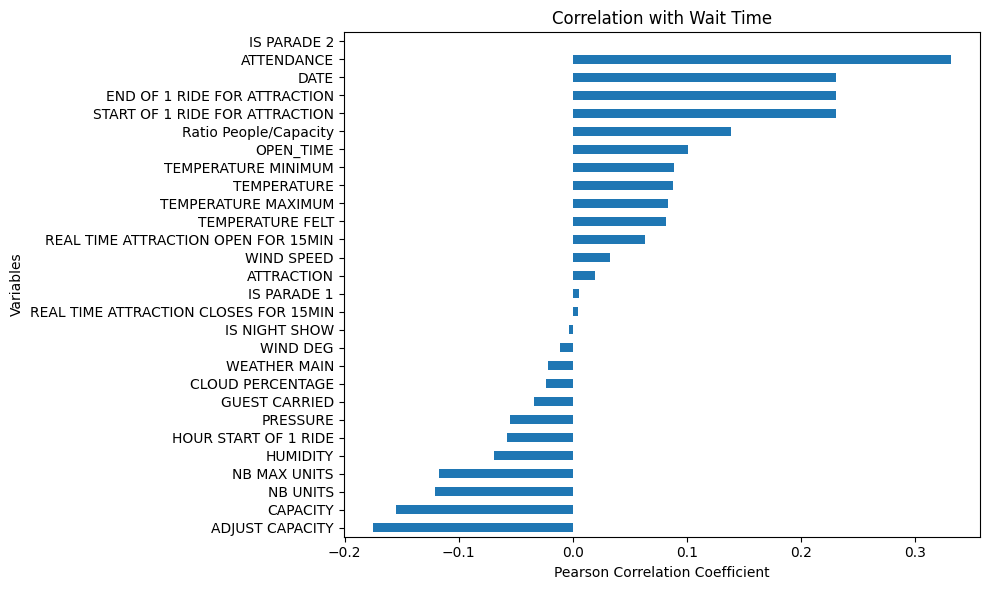

In [27]:
df_15_bis['WEATHER MAIN'] = pd.factorize(df_15_bis['WEATHER MAIN'])[0]
df_15_bis['ATTRACTION'] = pd.factorize(df_15_bis['ATTRACTION'])[0]
correlation_matrix = df_15_bis.corr()

wait_time_correlation = correlation_matrix['WAIT TIME']
wait_time_correlation = wait_time_correlation.drop('WAIT TIME', errors='ignore')

plt.figure(figsize=(10, 6))
wait_time_correlation.sort_values(ascending=True).plot(kind='barh')
plt.title('Correlation with Wait Time')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()